In [49]:
import numpy as np
import pandas as pd
train_df = pd.read_csv("D:\\ExcelR Assignments\\Assignment 15\\Titanic_train.csv")
test_df = pd.read_csv("D:\\ExcelR Assignments\\Assignment 15\\Titanic_test.csv")

In [51]:
# Display basic info to check the structure of the datasets
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [53]:
#Display the first few rows of the training data for reference
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [55]:
# Check for missing values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
# There are some missing values in Age and Cabin

In [59]:
# Fill missing values for numerical columns (e.g., 'Age', 'Fare') with the mean
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

# Fill missing values for categorical columns (e.g., 'Embarked') with the most frequent value
train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Cabin'].mode()[0])
test_df['Cabin'] = test_df['Cabin'].fillna(test_df['Cabin'].mode()[0])

# Fill missing values for categorical columns (e.g., 'Embarked') with the most frequent value
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

In [61]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [63]:
#As we see there are know missing values now.

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

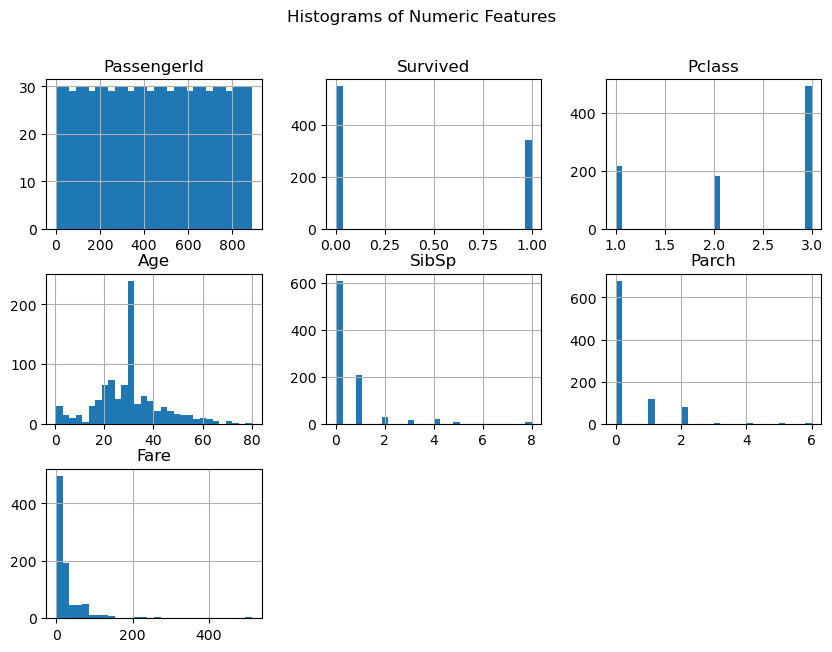

In [67]:
# Visualize data distributions for numeric columns
train_df.hist(bins=30, figsize=(10, 7))
plt.suptitle('Histograms of Numeric Features')
plt.show()

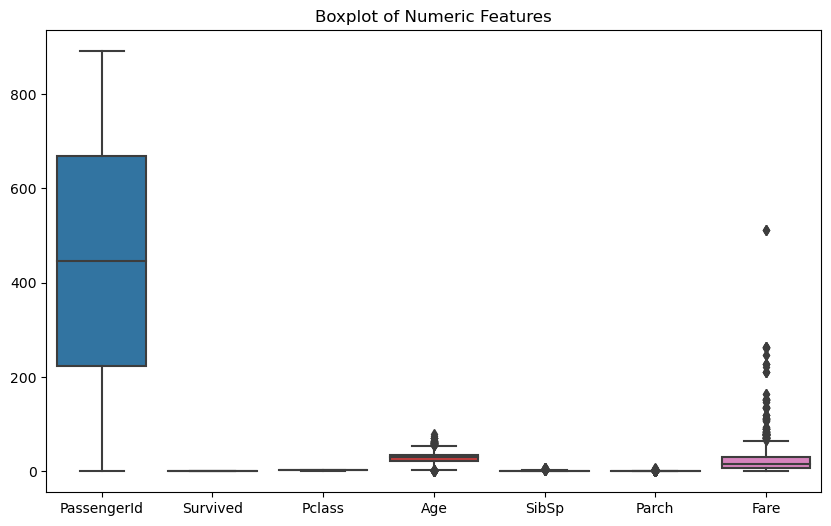

In [68]:
# Boxplot for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df.select_dtypes(include='number'))
plt.title('Boxplot of Numeric Features')
plt.show()

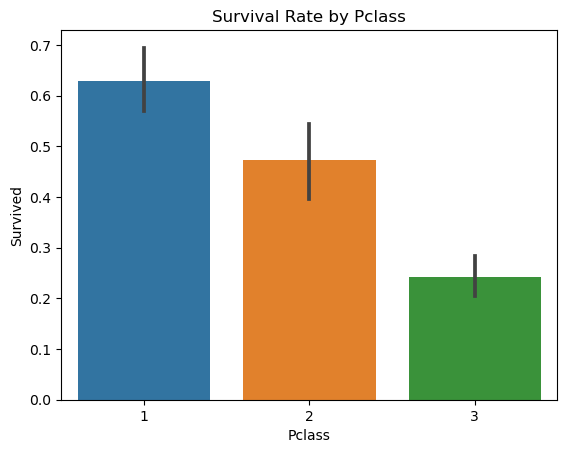

In [69]:
# Visualize relationships between features and survival
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

In [70]:
# As we see the survival rate is high for pclass 1 and low for pclass 3. 

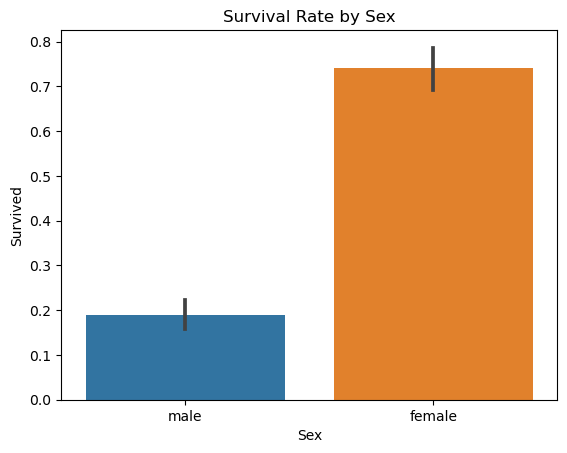

In [71]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

In [72]:
# Female people in the ship has more chances of surviving than male.

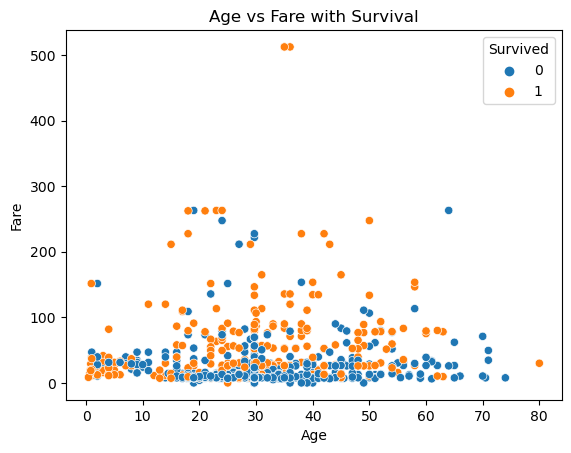

In [75]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Age vs Fare with Survival')
plt.show()

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.transform(test_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_encoder.transform(test_df['Embarked'])

# Drop unnecessary columns like 'Name' and 'Ticket' from both train and test datasets
train_df.drop(['Name', 'Ticket','Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket','Cabin'], axis=1, inplace=True)

# Split the training data into features (X) and target (y)
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train LightGBM model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Predict using LightGBM
lgbm_pred = lgbm_model.predict(X_test)

# Evaluate LightGBM model
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm_f1 = f1_score(y_test, lgbm_pred)

print("LightGBM Performance:")
print(f"Accuracy: {lgbm_accuracy}")
print(f"Precision: {lgbm_precision}")
print(f"Recall: {lgbm_recall}")
print(f"F1-score: {lgbm_f1}")

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
xgb_pred = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

print("XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-score: {xgb_f1}")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


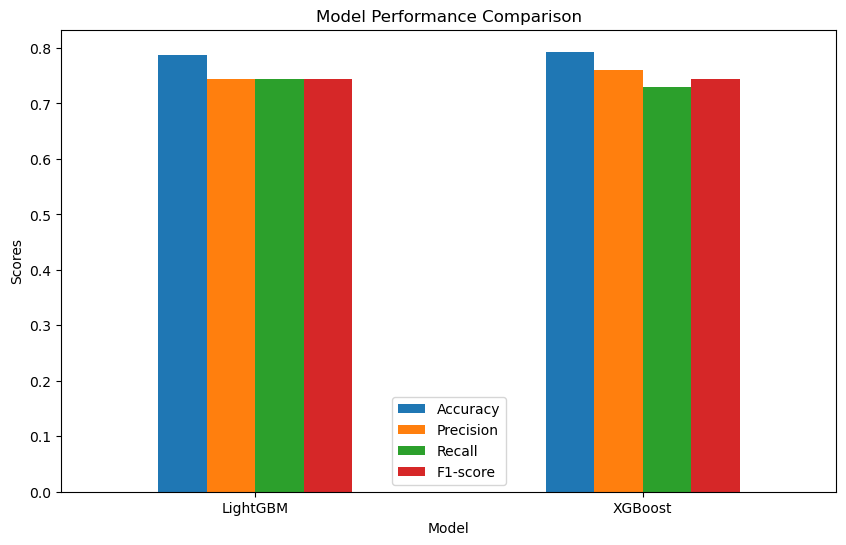

In [93]:
# Compare the performance of both models
results = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgbm_accuracy, xgb_accuracy],
    'Precision': [lgbm_precision, xgb_precision],
    'Recall': [lgbm_recall, xgb_recall],
    'F1-score': [lgbm_f1, xgb_f1]
}

results_df = pd.DataFrame(results)

# Plotting comparison of the models
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()

In [ ]:
'''
The key insights from comparing the two models are as follows:

Accuracy: XGBoost achieved a higher accuracy (0.79) compared to LightGBM (0.78).
Precision: XGBoost also had slightly better precision (0.76 vs. 0.74), meaning it was better at identifying passengers who survived.
Recall: Both models showed similar recall (XGBoost 0.72 vs. LightGBM 0.74), indicating that lightgbm performed good in identifying actual survivors.
F1-Score:Both models showed similar F1-score (0.74 vs. 0.74), indicating that overall performance was good for both the algorithms.

Conclusion:
Both LightGBM and XGBoost are excellent choices for classification tasks, with XGBoost marginally outperforming 
LightGBM in this particular Titanic dataset analysis. However, depending on the use case (e.g., speed vs. accuracy), 
LightGBM could still be a good alternative.
'''